# 🛒 Active Product Sales Analysis using Matplotlib in Python 🛒
## I. Content

Every modern company that engages in online sales or maintains a specialized e-commerce website now aims to maximize its throughput in order to determine what precisely their clients need in order to increase their chances of sales. The huge datasets handed to us can be properly analyzed to find out what time of day has the highest user activity in terms of transactions.

In this post, We will use Python Pandas and Matplotlib to analyze the insight of the dataset. We can use the column Transaction Date, in this case, to glean useful insights on the busiest time (hour) of the day.

Link: https://www.geeksforgeeks.org/data-science/active-product-sales-analysis-using-matplotlib-in-python/

## II. Insight

### 📊 Suggested Analyses from Transaction Data

With this dataset, you can perform various types of analysis to extract useful insights about customer behavior, purchasing trends, and product performance. Below are some key analysis suggestions:

---

#### 1. **Purchase Time Analysis** ⏰

- Identify peak hours when customers make the most purchases (e.g., determine which hours have the highest number of transactions).
- Analyze patterns by day or week to understand when customers tend to buy, which can help optimize marketing campaigns or services.

---

#### 2. **Product Analysis** 📦

- Determine the most popular products based on purchase frequency.
- Analyze which products are often purchased together (e.g., items within the same order).

---

#### 3. **Customer Analysis** 👤

- Identify top customers by number of purchases or repeated buying behavior.
- Detect high-value customers based on total transaction value.

---

#### 4. **Purchase Frequency** 🔁

- Count how many times each customer makes a purchase within the dataset.
- Analyze the time intervals between purchases to predict future buying behavior.

---

#### 5. **Trend & Seasonality Analysis** 📈

- If long-term data is available, examine seasonal trends or behaviors during special occasions and holidays.

---

#### 6. **Multi-product Order Analysis** 🛒

- Evaluate whether customers tend to buy multiple products in one order, which can support upselling/cross-selling strategies.

---

## III. Data cleaning
### 📚 Import libraries

In [2]:
# your code here
# Import necessary libraries
import pandas as pd                # Handle tabular data
import numpy as np                # Handle missing values, NaN, and mathematical operations
import dateparser                 # Parse date/time from natural language strings
from datetime import datetime     # Work with date and time objects
from collections import Counter   # Count errors or anomalies in data
import math                       # Mathematical functions
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Visualization with advanced plots

In [3]:
# your code here

Order_Details = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/20240910113410/Order_details-masked.csv")
Order_Details.sample(5)

,Name,Email,Product,Transaction Date
58,PERSON_57,PERSON_57@gmail.com,PRODUCT_25,02/03/2021 16:39:10
39,PERSON_39,PERSON_39@gmail.com,PRODUCT_25,02/03/2021 00:12:05
240,PERSON_230,PERSON_230@gmail.com,PRODUCT_63,04/03/2021 15:40:46
523,PERSON_476,PERSON_476@gmail.com,"PRODUCT_37,PRODUCT_33,PRODUCT_74",07/03/2021 20:14:52
379,PERSON_352,PERSON_352@emamigroup.com,"PRODUCT_26,PRODUCT_86",06/03/2021 14:46:44


### 🍍 Generate statistical summaries for the dataframe

In [4]:
Order_Details.shape

(581, 4)

In [ ]:
# List column names in dataframe
Order_Details.columns

Index(['Name', 'Email', 'Product', 'Transaction Date'], dtype='object')

In [ ]:
# Statistics (for numeric format only)
Order_Details.describe()

,Name,Email,Product,Transaction Date
count,581,581,581,581
unique,525,525,252,581
top,PERSON_470,PERSON_470@gmail.com,PRODUCT_75,01/03/2021 00:47:26
freq,5,5,74,1


In [7]:
# Show dataset information
Order_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


In [8]:
Order_Details.sample(3)

,Name,Email,Product,Transaction Date
125,PERSON_121,PERSON_121@hotmail.com,PRODUCT_75,03/03/2021 15:47:17
563,PERSON_24,PERSON_24@kamalmotors.co.in,PRODUCT_68,07/03/2021 23:05:44
144,PERSON_139,PERSON_139@gmail.com,"PRODUCT_63,PRODUCT_25,PRODUCT_84,PRODUCT_75,PR...",03/03/2021 18:56:31


### 🔍 Cleaning data

In [ ]:
# Count empty values in columns
Order_Details.isna().sum()

Name                0
Email               0
Product             0
Transaction Date    0
dtype: int64

In [ ]:
# Show columns index

for i, col in enumerate(Order_Details.columns):
    print(i, col)

0 Name
1 Email
2 Product
3 Transaction Date


In [ ]:
# Count the number of fully duplicated rows
num_duplicates = Order_Details.duplicated().sum()
print(f"The number of fully duplicated rows: {num_duplicates}")

Số dòng trùng lặp hoàn toàn là: 0


In [12]:
Order_Details.shape

(581, 4)

Format datetime and add `Hour` column

In [13]:
# here we have taken Transaction
# date column
Order_Details['Time'] = pd.to_datetime(Order_Details['Transaction Date'])


# After that we extracted hour 
# from Transaction date column
Order_Details['Hour'] = (Order_Details['Time']).dt.hour


In [ ]:
# Check datatype
print(Order_Details['Time'].dtypes)  # Ensure datetime64[ns]

datetime64[ns]


In [ ]:
# Check datetime 

import pandas as pd

# List of columns
cols_to_check = ['Time']

def count_invalid_datetime(series):
    non_blank = series.dropna().astype(str).str.strip()
    non_blank = non_blank[non_blank != '']
    return (pd.to_datetime(non_blank, errors='coerce').isna()).sum()

# Stats of datetime errors
invalid_counts = {col: count_invalid_datetime(Order_Details[col]) for col in cols_to_check}
invalid_counts

{'Time': 0}

In [16]:
Order_Details.sample(5)

,Name,Email,Product,Transaction Date,Time,Hour
576,PERSON_522,PERSON_522@gmail.com,"PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...",07/03/2021 23:53:03,2021-07-03 23:53:03,23
477,PERSON_439,PERSON_439@gmail.com,PRODUCT_64,07/03/2021 13:52:41,2021-07-03 13:52:41,13
52,PERSON_51,PERSON_51@gmail.com,"PRODUCT_75,PRODUCT_63",02/03/2021 13:43:28,2021-02-03 13:43:28,13
14,PERSON_15,PERSON_15@gmail.com,PRODUCT_25,01/03/2021 14:37:16,2021-01-03 14:37:16,14
133,PERSON_129,PERSON_129@gmail.com,PRODUCT_63,03/03/2021 16:33:28,2021-03-03 16:33:28,16


⏰ List the hour

In [17]:
# n =24 in this case, can be modified
# as per need to see top 'n' busiest hours
timemost1 = Order_Details['Hour'].value_counts().index.tolist()[:24] 

timemost2 = Order_Details['Hour'].value_counts().values.tolist()[:24]

## 🛠 EDA
### Purchase Time Analysis

In [18]:
# we stack the indices (hour) and frequencies together to yield the final result.
tmost = np.column_stack((timemost1,timemost2))

print(" Hour Of Day" + "\t" + "Cumulative Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost))

 Hour Of Day	Cumulative Number of Purchases 

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


Before we can create an appropriate data visualization, we must make the list slightly more customizable. To do so, we gather the hourly frequencies and perform the following tasks:

In [19]:
timemost = Order_Details['Hour'].value_counts()
timemost1 = []

for i in range(0,23):
    timemost1.append(i)
    
timemost2 = timemost.sort_index()
timemost2.tolist()
timemost2 = pd.DataFrame(timemost2)

📰 Data visualization

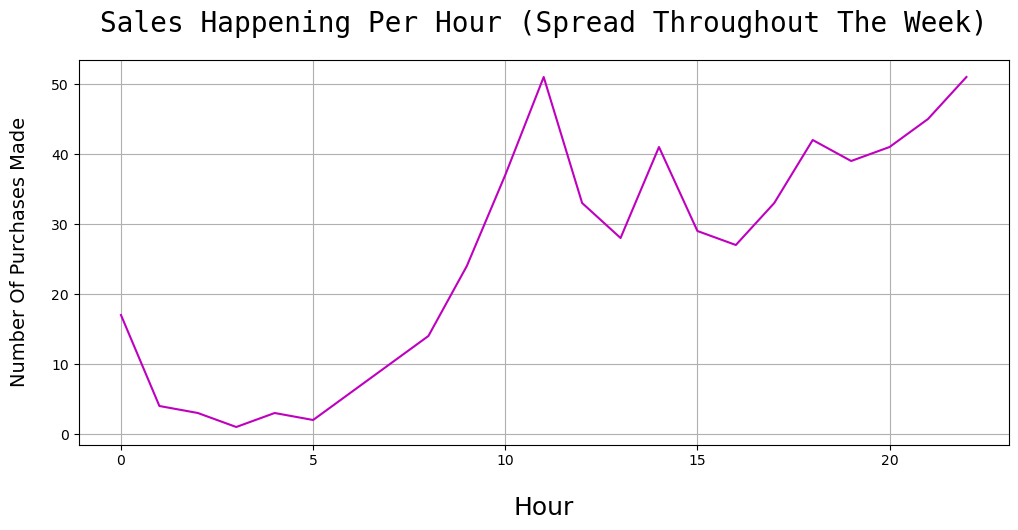

In [29]:
plt.figure(figsize=(12, 5))

plt.title('Sales Happening Per Hour (Spread Throughout The Week)',
          fontdict={'fontname': 'monospace', 'fontsize': 20}, y=1.05)

plt.ylabel("Number Of Purchases Made", fontsize=14, labelpad=16)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(timemost1, timemost2, color='m')
plt.grid()
plt.show()

In [ ]:
# Stats by weekday
import pandas as pd

# Convert to datetime
Order_Details['Time'] = pd.to_datetime(Order_Details['Transaction Date'])

# Weekday (0=Monday, .., 6=Sunday)
Order_Details['DayOfWeek'] = Order_Details['Time'].dt.dayofweek

# Convert to weekday
days_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
Order_Details['DayName'] = Order_Details['DayOfWeek'].map(days_mapping)

# Order weekday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count by weekday
day_counts = Order_Details['DayName'].value_counts().reindex(day_order)

print(day_counts)

DayName
Monday        62.0
Tuesday        NaN
Wednesday    152.0
Thursday     100.0
Friday         NaN
Saturday     229.0
Sunday        38.0
Name: count, dtype: float64


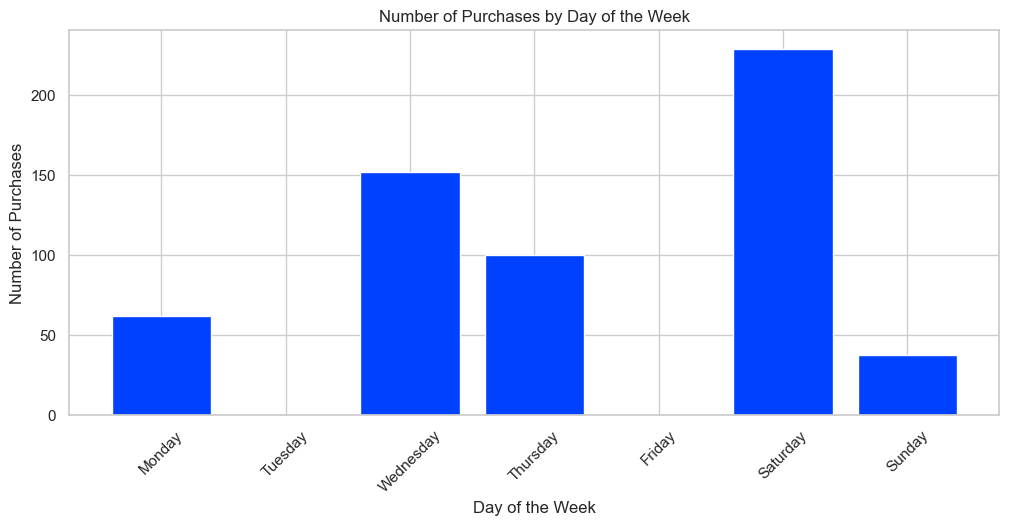

In [129]:
import matplotlib.pyplot as plt

# Plot a chart
plt.figure(figsize=(12,5))
plt.bar(day_counts.index, day_counts.values, color='#0040ff')

# Title and labels
plt.title('Number of Purchases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Purchases')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()


### Analysis by product

Most frequently purchased products:
PRODUCT_75    121
PRODUCT_63     97
PRODUCT_27     76
PRODUCT_25     59
PRODUCT_12     52
             ... 
PRODUCT_73      1
PRODUCT_82      1
PRODUCT_45      1
PRODUCT_93      1
PRODUCT_17      1
Name: count, Length: 95, dtype: int64


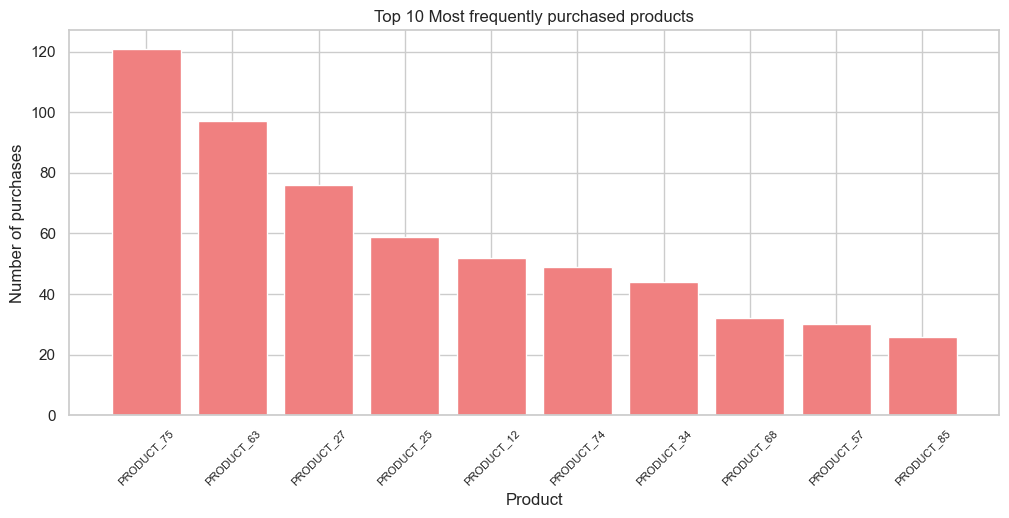

In [91]:
# Stats by products

import pandas as pd

# Step 1: Split products from the string into a list
# Create a list of all purchased products
all_products = []

for products in Order_Details['Product']:
    # Split into individual product items
    product_list = products.split(',')
    # Append to the master list
    all_products.extend(product_list)

# Step 2: Count the number of occurrences for each product
product_series = pd.Series(all_products)

product_counts = product_series.value_counts()

# Step 3: Display the most popular products
print("Most frequently purchased products:")
print(product_counts)

# Create a chart
import matplotlib.pyplot as plt

top_n = 10  # get the top 10 most popular products
top_products = product_counts.head(top_n)

plt.figure(figsize=(12,5))
plt.bar(top_products.index, top_products.values, color='lightcoral')
plt.xlabel('Product')
plt.ylabel('Number of purchases')
plt.title(f'Top {top_n} Most frequently purchased products')
plt.xticks(rotation=45, fontsize=8)
plt.show()

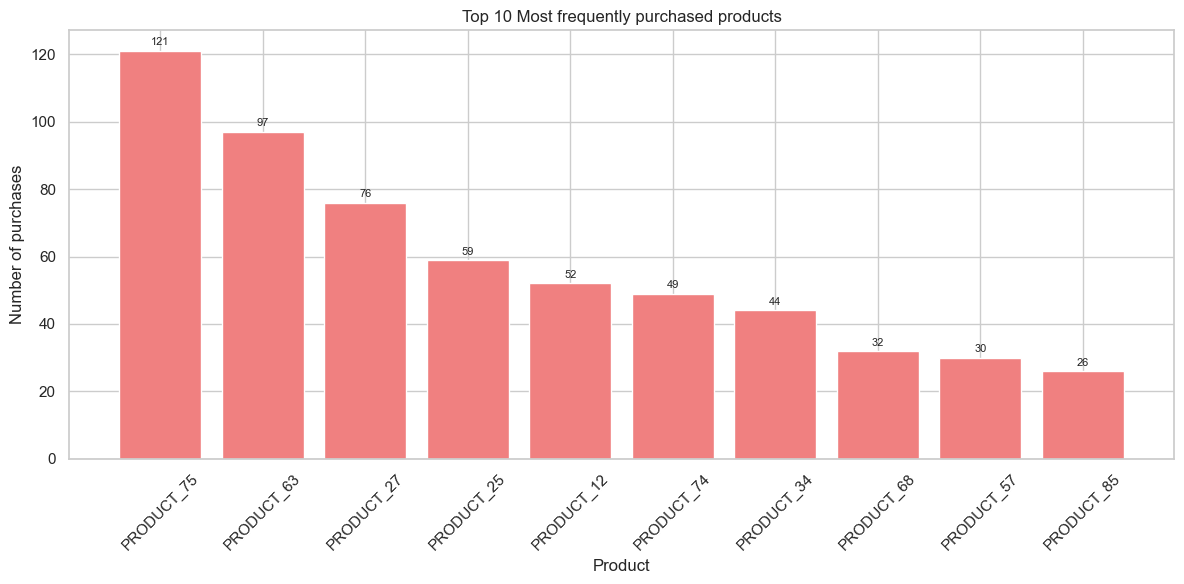

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Split the products from the string into a list
all_products = []

for products in Order_Details['Product']:
    product_list = products.split(',')
    all_products.extend(product_list)

# Step 2: Count the number of occurrences
product_series = pd.Series(all_products)
product_counts = product_series.value_counts()

# Step 3: Plot the chart
top_n = 10
top_products = product_counts.head(top_n)

plt.figure(figsize=(12,6))
bars = plt.bar(top_products.index, top_products.values, color='lightcoral')
plt.xlabel('Product')
plt.ylabel('Number of purchases')
plt.title(f'Top {top_n} Most frequently purchased products')
plt.xticks(rotation=45)

# 🔥 Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Co-Purchased products

In [93]:
# Products frequently bought together with top-selling products

import pandas as pd
from itertools import combinations
from collections import Counter

# Assume you have already split the product list in each order
order_products = []

for products in Order_Details['Product']:
    product_list = products.split(',')
    product_list = [p.strip() for p in product_list]
    order_products.append(product_list)

# Find groups (combinations) of 3 products in each order
group_size = 3  # May change to 2, 3, 4, ...
group_counter = Counter()

for products in order_products:
    # Generate all product group combinations of size 'group_size'
    groups = combinations(sorted(set(products)), group_size)
    group_counter.update(groups)

# Get the top_n most frequent product groups
top_n = 10
most_common_groups = group_counter.most_common(top_n)

print(f"Top {top_n} group {group_size} frequently bought together products:")
for group, count in most_common_groups:
    print(f"{', '.join(group)}: {count} time(s)")

Top 10 group 3 frequently bought together products:
PRODUCT_12, PRODUCT_55, PRODUCT_61: 13 time(s)
PRODUCT_12, PRODUCT_62, PRODUCT_85: 13 time(s)
PRODUCT_12, PRODUCT_28, PRODUCT_43: 12 time(s)
PRODUCT_12, PRODUCT_28, PRODUCT_49: 12 time(s)
PRODUCT_12, PRODUCT_28, PRODUCT_55: 12 time(s)
PRODUCT_12, PRODUCT_28, PRODUCT_61: 12 time(s)
PRODUCT_12, PRODUCT_28, PRODUCT_62: 12 time(s)
PRODUCT_12, PRODUCT_28, PRODUCT_85: 12 time(s)
PRODUCT_12, PRODUCT_43, PRODUCT_49: 12 time(s)
PRODUCT_12, PRODUCT_43, PRODUCT_55: 12 time(s)


In [94]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Step 1: Split the product list in each order
order_products = []

for products in Order_Details['Product']:
    product_list = products.split(',')
    product_list = [p.strip() for p in product_list]
    order_products.append(product_list)

# Step 2: Identify the top_n most popular products (based on total purchase count)
product_series = pd.Series([prod for sublist in order_products for prod in sublist])
top_n = 10
top_products = product_series.value_counts().head(top_n).index.tolist()

# Step 3: For each top_product, find the most frequently co-occurring products
results = {}

for top_product in top_products:
    co_products_counter = Counter()
    
    for products in order_products:
        if top_product in products:
            # Other products in the same order
            other_products = [p for p in products if p != top_product]
            co_products_counter.update(other_products)
    
    # Retrieve the most common co-purchased products
    most_common_co_products = co_products_counter.most_common(5)  # top 5 
    results[top_product] = most_common_co_products

# Step 4: Print the results
for product, co_products in results.items():
    print(f"\nProduct '{product}' frequently associated with:")
    for co_product, count in co_products:
        print(f"  - {co_product}: {count} time(s)")


Product 'PRODUCT_75' frequently associated with:
  - PRODUCT_68: 20 time(s)
  - PRODUCT_63: 16 time(s)
  - PRODUCT_27: 13 time(s)
  - PRODUCT_84: 8 time(s)
  - PRODUCT_12: 5 time(s)

Product 'PRODUCT_63' frequently associated with:
  - PRODUCT_27: 28 time(s)
  - PRODUCT_75: 16 time(s)
  - PRODUCT_90: 8 time(s)
  - PRODUCT_12: 7 time(s)
  - PRODUCT_68: 6 time(s)

Product 'PRODUCT_27' frequently associated with:
  - PRODUCT_63: 28 time(s)
  - PRODUCT_75: 13 time(s)
  - PRODUCT_90: 9 time(s)
  - PRODUCT_84: 9 time(s)
  - PRODUCT_25: 8 time(s)

Product 'PRODUCT_25' frequently associated with:
  - PRODUCT_27: 8 time(s)
  - PRODUCT_48: 7 time(s)
  - PRODUCT_54: 6 time(s)
  - PRODUCT_11: 5 time(s)
  - PRODUCT_63: 5 time(s)

Product 'PRODUCT_12' frequently associated with:
  - PRODUCT_85: 15 time(s)
  - PRODUCT_55: 14 time(s)
  - PRODUCT_61: 13 time(s)
  - PRODUCT_62: 13 time(s)
  - PRODUCT_49: 12 time(s)

Product 'PRODUCT_74' frequently associated with:
  - PRODUCT_33: 7 time(s)
  - PRODUCT_

In [95]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Step 1: Split the list of products in each order
order_products = []

for products in Order_Details['Product']:
    product_list = products.split(',')
    product_list = [p.strip() for p in product_list]
    order_products.append(product_list)

# Step 2: Identify the top 10 best-selling products
product_series = pd.Series([prod for sublist in order_products for prod in sublist])
top_10_products = product_series.value_counts().head(10).index.tolist()

# Step 3: For each product in the top 10, find the most common accompanying products
results = {}

for top_product in top_10_products:
    co_products_counter = Counter()
    
    for products in order_products:
        if top_product in products:
            # Find other products in the same order
            other_products = [p for p in products if p != top_product]
            co_products_counter.update(other_products)
    
    # Get the 5 most common co-purchased products
    most_common_co_products = co_products_counter.most_common(5)
    results[top_product] = most_common_co_products

# Step 4: Display the results
print("Top 10 best-selling products and their most common co-purchased items:\n")
for product, co_products in results.items():
    print(f"Product '{product}' is often purchased with:")
    for co_product, count in co_products:
        print(f"  - {co_product}: {count} times")
    print()


Top 10 best-selling products and their most common co-purchased items:

Product 'PRODUCT_75' is often purchased with:
  - PRODUCT_68: 20 times
  - PRODUCT_63: 16 times
  - PRODUCT_27: 13 times
  - PRODUCT_84: 8 times
  - PRODUCT_12: 5 times

Product 'PRODUCT_63' is often purchased with:
  - PRODUCT_27: 28 times
  - PRODUCT_75: 16 times
  - PRODUCT_90: 8 times
  - PRODUCT_12: 7 times
  - PRODUCT_68: 6 times

Product 'PRODUCT_27' is often purchased with:
  - PRODUCT_63: 28 times
  - PRODUCT_75: 13 times
  - PRODUCT_90: 9 times
  - PRODUCT_84: 9 times
  - PRODUCT_25: 8 times

Product 'PRODUCT_25' is often purchased with:
  - PRODUCT_27: 8 times
  - PRODUCT_48: 7 times
  - PRODUCT_54: 6 times
  - PRODUCT_11: 5 times
  - PRODUCT_63: 5 times

Product 'PRODUCT_12' is often purchased with:
  - PRODUCT_85: 15 times
  - PRODUCT_55: 14 times
  - PRODUCT_61: 13 times
  - PRODUCT_62: 13 times
  - PRODUCT_49: 12 times

Product 'PRODUCT_74' is often purchased with:
  - PRODUCT_33: 7 times
  - PRODUCT

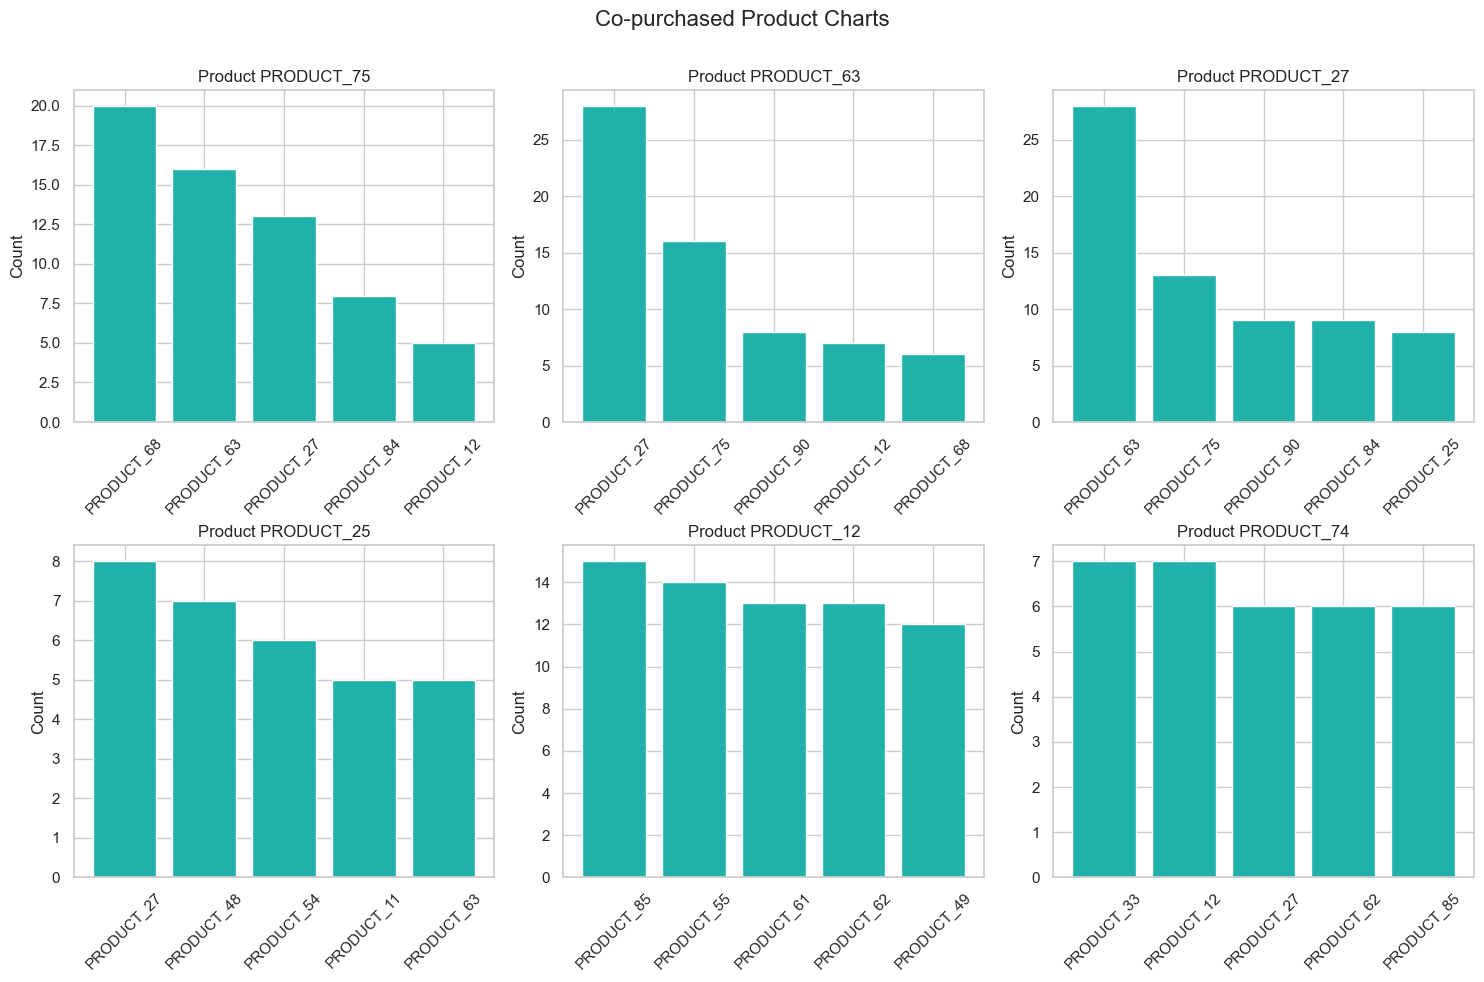

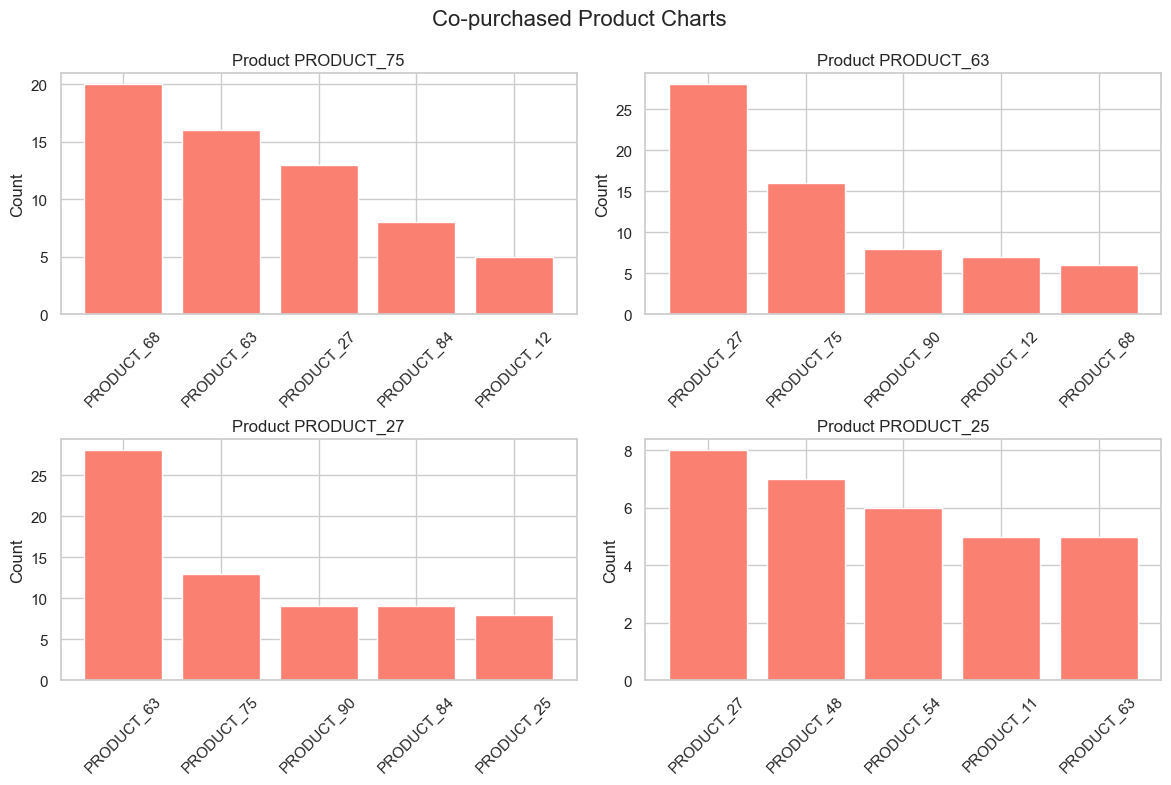

In [96]:
import matplotlib.pyplot as plt

# Simulate data; replace with your actual result
# 'results' is a dict, each key is a product name, value is a list of (co_product, count) pairs
sample_results = list(results.values())

# Plot 2 rows, 3 columns (6 charts)
fig1, axes1 = plt.subplots(2, 3, figsize=(15, 10))
axes1 = axes1.flatten()

for i in range(6):
    if i < len(sample_results):
        co_products = sample_results[i]
        labels = [p[0] for p in co_products]
        counts = [p[1] for p in co_products]
        axes1[i].bar(labels, counts, color='#20B2AA')
        axes1[i].set_title(f'Product {list(results.keys())[i]}')  # Show the main product name
        # axes1[i].set_xlabel('Co-purchased Product')
        axes1[i].set_ylabel('Count')
        axes1[i].set_xticks(range(len(labels)))               # Set x-tick positions
        axes1[i].set_xticklabels(labels, rotation=45)         # Rotate x-tick labels 45 degrees
    else:
        axes1[i].axis('off')  # Hide subplot if there's no data

plt.tight_layout()
plt.suptitle('Co-purchased Product Charts', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

# Plot 2 rows, 2 columns (4 charts)
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 8))
axes2 = axes2.flatten()

for i in range(4):
    if i < len(sample_results):
        co_products = sample_results[i]
        labels = [p[0] for p in co_products]
        counts = [p[1] for p in co_products]
        axes2[i].bar(labels, counts, color='salmon')
        axes2[i].set_title(f'Product {list(results.keys())[i]}')  # Show the main product name
        # axes2[i].set_xlabel('Co-purchased Product')
        axes2[i].set_ylabel('Count')
        axes2[i].set_xticks(range(len(labels)))               # Set x-tick positions
        axes2[i].set_xticklabels(labels, rotation=45)         # Rotate x-tick labels 45 degrees
    else:
        axes2[i].axis('off')

plt.tight_layout()
plt.suptitle('Co-purchased Product Charts', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


Top Co-Purchased Product

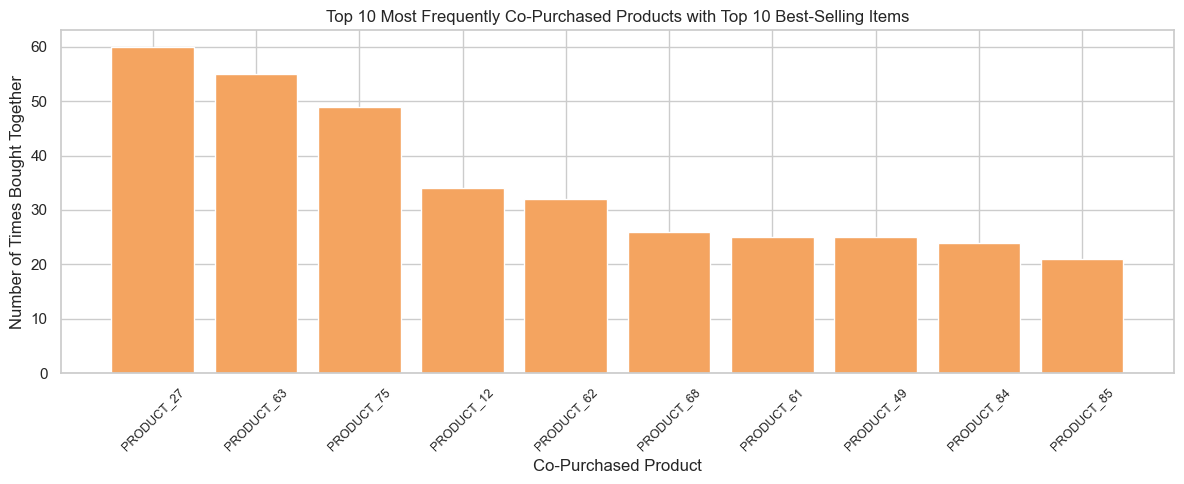

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Combine all co-purchased products of the top 10 into a single list
co_product_counts = Counter()

for co_products in results.values():
    for co_product, count in co_products:
        co_product_counts[co_product] += count

# Select the top 10 most frequently co-purchased products from this aggregation
top_co_products = co_product_counts.most_common(10)

# Plot the chart
labels = [p[0] for p in top_co_products]
counts = [p[1] for p in top_co_products]

plt.figure(figsize=(12,5))
plt.bar(labels, counts, color='#F4A460')
plt.title('Top 10 Most Frequently Co-Purchased Products with Top 10 Best-Selling Items')
plt.xlabel('Co-Purchased Product')
plt.ylabel('Number of Times Bought Together')
plt.xticks(rotation=45, fontsize = 9)
plt.tight_layout()
plt.show()


### Customer Analysis

In [98]:
import pandas as pd
import numpy as np

# Assume the 'Amount' column exists or is derived from other data
# In your real dataset, ensure there is a column with transaction value, e.g.:
# Order_Details['Amount'] = ... (total order value)
# Here, we simulate an 'Amount' column with random values between 50 and 500
np.random.seed(0)
Order_Details['Amount'] = np.random.uniform(50, 500, size=len(Order_Details))

# --- Customer Analysis ---

# Group by customer (assuming a 'CustomerID' column or similar)
# If there is no such column, identify the appropriate one to distinguish customers
# In your data, we use the 'Name' or 'Email' column to represent customers

# 1. Count the number of purchases per customer
repeat_customers = Order_Details.groupby('Name').size().reset_index(name='Purchase_Count')

# 2. Calculate the total transaction value per customer
total_value = Order_Details.groupby('Name')['Amount'].sum().reset_index(name='Total_Value')

# 3. Merge the datasets for comprehensive analysis
customer_analysis = pd.merge(repeat_customers, total_value, on='Name')

# 4. Rank customers by number of purchases
top_by_frequency = customer_analysis.sort_values(by='Purchase_Count', ascending=False)

# 5. Rank customers by total transaction value
top_by_value = customer_analysis.sort_values(by='Total_Value', ascending=False)

# Results
print("Top customers by number of purchases:")
print(top_by_frequency.head(10))

print("\nTop customers by total transaction value:")
print(top_by_value.head(10))


Top customers by number of purchases:
           Name  Purchase_Count  Total_Value
412  PERSON_470               5  1285.689849
257  PERSON_330               4  1051.732274
212  PERSON_290               3   990.568531
63   PERSON_156               3   647.973954
204  PERSON_283               3  1002.824760
498   PERSON_75               3  1014.539078
474   PERSON_53               2   275.512473
471  PERSON_523               2   699.714587
467   PERSON_52               2   400.890819
51   PERSON_145               2   929.072022

Top customers by total transaction value:
           Name  Purchase_Count  Total_Value
412  PERSON_470               5  1285.689849
257  PERSON_330               4  1051.732274
498   PERSON_75               3  1014.539078
204  PERSON_283               3  1002.824760
212  PERSON_290               3   990.568531
350  PERSON_414               2   943.264023
51   PERSON_145               2   929.072022
494   PERSON_71               2   889.955418
156   PERSON_24    

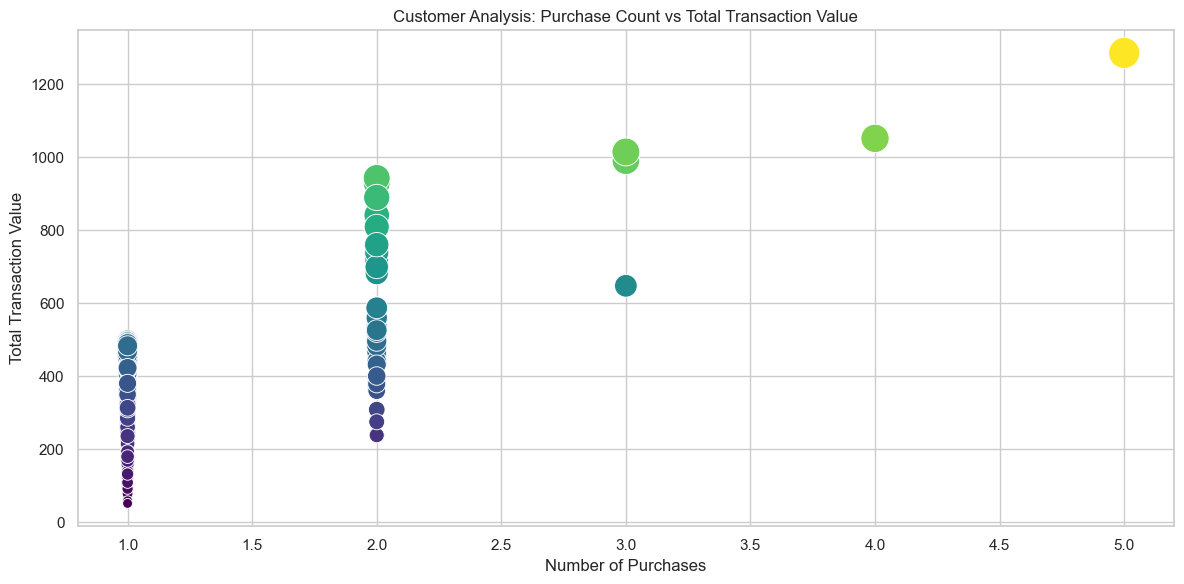

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Total transaction value vs. Number of purchases per customer
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=customer_analysis,
    x='Purchase_Count',
    y='Total_Value',
    hue='Total_Value',
    palette='viridis',
    size='Total_Value',
    sizes=(50, 500),
    legend=False
)
plt.title('Customer Analysis: Purchase Count vs Total Transaction Value')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Transaction Value')
plt.grid(True)
plt.tight_layout()
plt.show()



💹 Reference charts

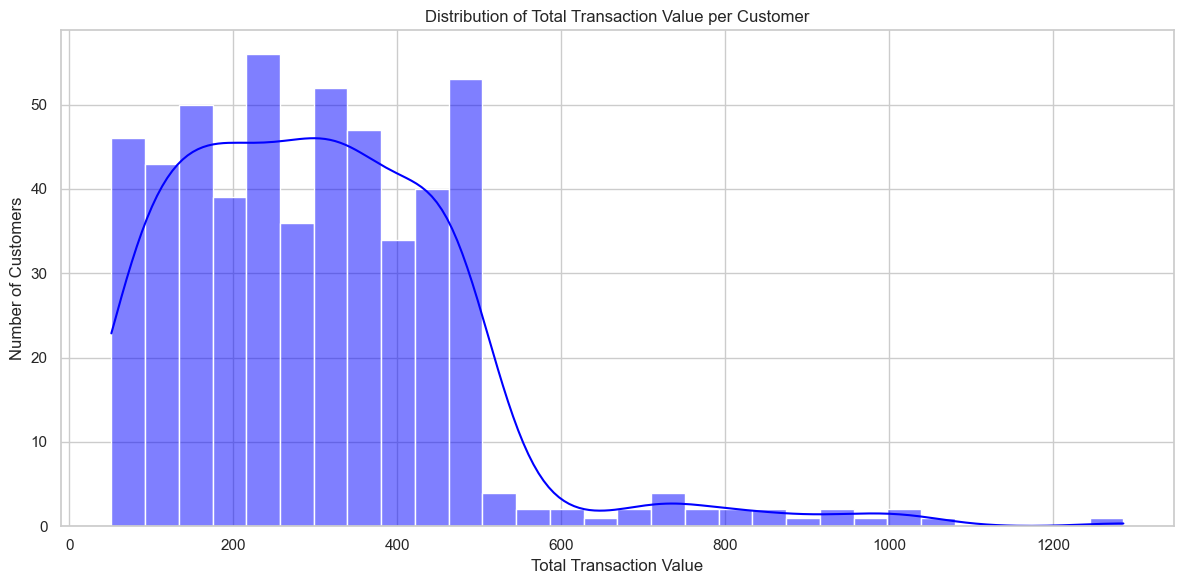

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution Plot: Distribution of customers' transaction values
plt.figure(figsize=(12, 6))
sns.histplot(
    data=customer_analysis,
    x='Total_Value',
    kde=True,  # Show Kernel Density Estimation (KDE) curve
    bins=30,
    color='blue'
)
plt.title('Distribution of Total Transaction Value per Customer')
plt.xlabel('Total Transaction Value')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


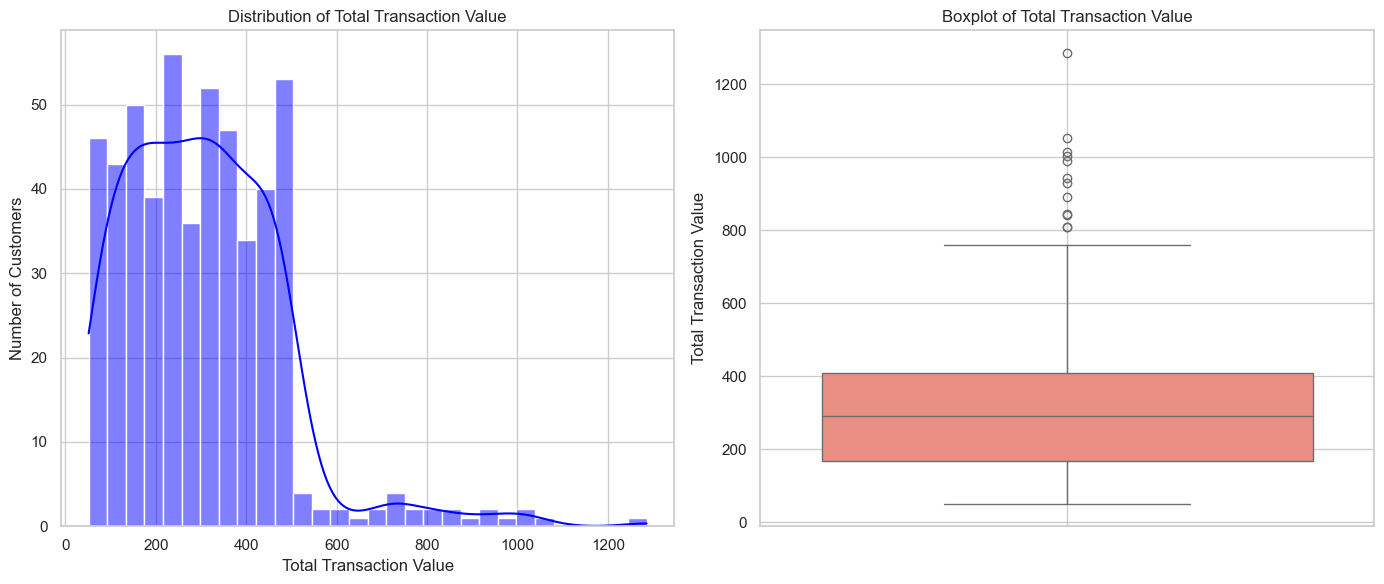

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# 1. Distribution Plot
plt.subplot(1, 2, 1)
sns.histplot(
    data=customer_analysis,
    x='Total_Value',
    kde=True,
    bins=30,
    color='blue'
)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Transaction Value')
plt.ylabel('Number of Customers')
plt.grid(True)

# 2. Boxplot – Check for outliers
plt.subplot(1, 2, 2)
sns.boxplot(
    y='Total_Value',
    data=customer_analysis,
    color='salmon'
)
plt.title('Boxplot of Total Transaction Value')
plt.ylabel('Total Transaction Value')
plt.grid(True)

plt.tight_layout()
plt.show()


### Purchase frequency

In [119]:
Order_Details.sample(5)

,Name,Email,Product,Transaction Date,Time,Hour,DayOfWeek,DayName,Amount
70,PERSON_69,PERSON_69@gmail.com,PRODUCT_87,02/03/2021 22:21:08,2021-02-03 22:21:08,22,2,Wednesday,489.406759
369,PERSON_344,PERSON_344@gmail.com,PRODUCT_34,06/03/2021 12:42:54,2021-06-03 12:42:54,12,3,Thursday,360.511259
359,PERSON_330,PERSON_330@gmail.com,"PRODUCT_34,PRODUCT_30,PRODUCT_76,PRODUCT_26,PR...",06/03/2021 12:02:28,2021-06-03 12:02:28,12,3,Thursday,480.382575
215,PERSON_206,PERSON_206@gmail.com,PRODUCT_27,04/03/2021 12:45:04,2021-04-03 12:45:04,12,5,Saturday,391.270394
506,PERSON_462,PERSON_462@gmail.com,"PRODUCT_12,PRODUCT_32",07/03/2021 18:19:31,2021-07-03 18:19:31,18,5,Saturday,438.043346


In [120]:
import pandas as pd

# Assume the DataFrame is df (replace with actual DataFrame if not already loaded)
# If not available, use the line below to load it:
# df = pd.read_csv("file.csv") 

# Convert 'Time' column to datetime format
Order_Details['Time'] = pd.to_datetime(Order_Details['Time'])

# Sort data by customer name and purchase time
df_sorted = Order_Details.sort_values(by=['Name', 'Time'])

# Count the number of purchases per customer
purchase_counts = df_sorted.groupby('Name')['Time'].count().reset_index()
purchase_counts.columns = ['Name', 'Purchase Count']

# Calculate the time interval between purchases for each customer
df_sorted['Prev Purchase'] = df_sorted.groupby('Name')['Time'].shift(1)
df_sorted['Days Since Last Purchase'] = (df_sorted['Time'] - df_sorted['Prev Purchase']).dt.days

# Calculate the average interval between purchases for each customer
recency = df_sorted.groupby('Name')['Days Since Last Purchase'].mean().reset_index()
recency.columns = ['Name', 'Avg Days Between Purchases']

# Merge the purchase count and recency into one DataFrame
customer_behavior = pd.merge(purchase_counts, recency, on='Name', how='left')

# Display the top 10 customers with the highest number of purchases
print(customer_behavior.sort_values(by='Purchase Count', ascending=False).head(10))


           Name  Purchase Count  Avg Days Between Purchases
412  PERSON_470               5                         0.0
257  PERSON_330               4                         0.0
212  PERSON_290               3                         0.0
63   PERSON_156               3                        60.5
204  PERSON_283               3                        15.5
498   PERSON_75               3                        60.5
474   PERSON_53               2                        89.0
471  PERSON_523               2                         0.0
467   PERSON_52               2                        27.0
51   PERSON_145               2                        92.0


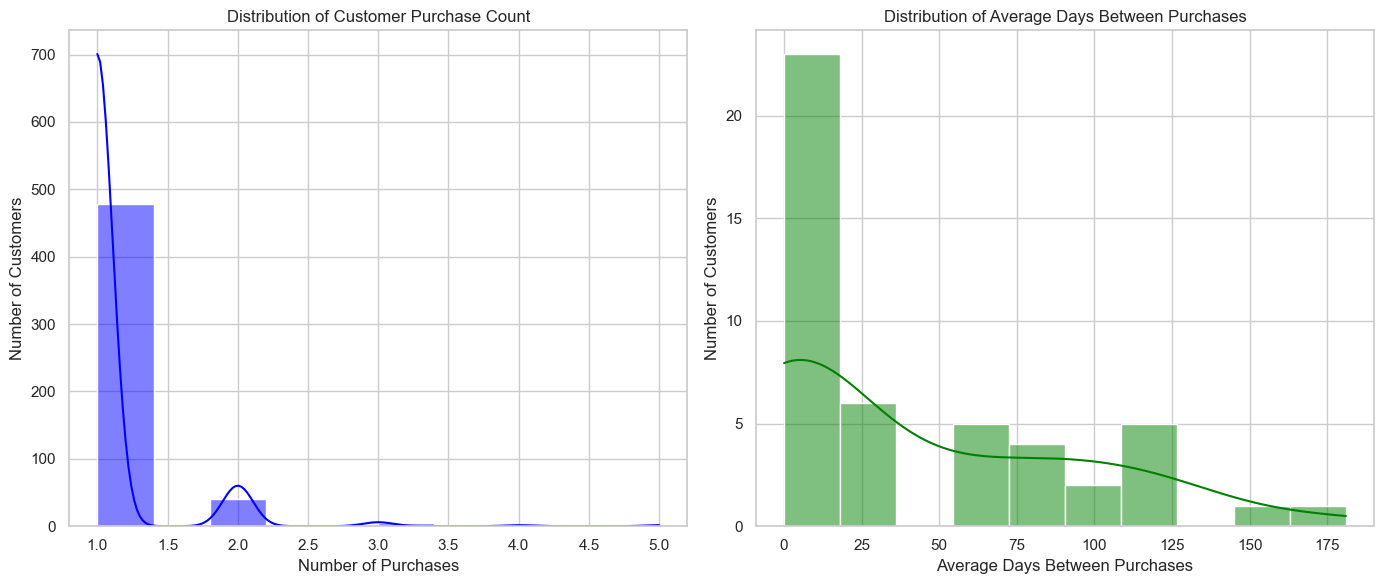

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# 1. Distribution of Purchase Count
plt.subplot(1, 2, 1)
sns.histplot(
    customer_behavior['Purchase Count'],
    bins=10,
    kde=True,
    color='blue'
)
plt.title("Distribution of Customer Purchase Count")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.grid(True)

# 2. Distribution of Average Days Between Purchases
plt.subplot(1, 2, 2)
sns.histplot(
    customer_behavior['Avg Days Between Purchases'].dropna(),
    bins=10,
    kde=True,
    color='green'
)
plt.title("Distribution of Average Days Between Purchases")
plt.xlabel("Average Days Between Purchases")
plt.ylabel("Number of Customers")
plt.grid(True)

plt.tight_layout()
plt.show()


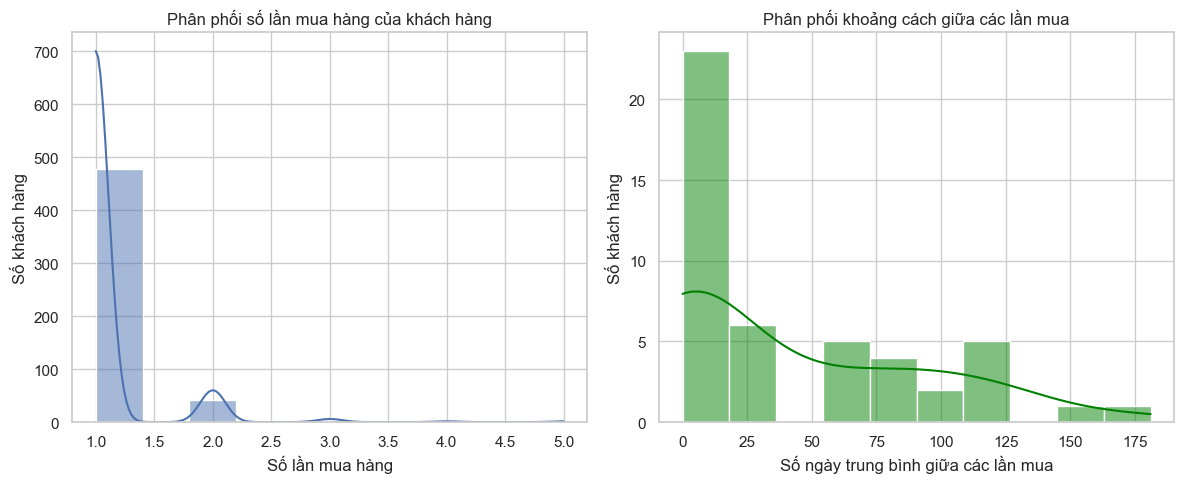

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo figure có 2 subplot (2 hàng, 1 cột)
#fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Nếu muốn 2 cột cạnh nhau

# Biểu đồ 1: Số lần mua hàng
sns.histplot(customer_behavior['Purchase Count'], bins=10, kde=True, ax=axs[0])
axs[0].set_title("Phân phối số lần mua hàng của khách hàng")
axs[0].set_xlabel("Số lần mua hàng")
axs[0].set_ylabel("Số khách hàng")

# Biểu đồ 2: Khoảng cách trung bình giữa các lần mua
sns.histplot(customer_behavior['Avg Days Between Purchases'].dropna(), bins=10, kde=True, color='green', ax=axs[1])
axs[1].set_title("Phân phối khoảng cách giữa các lần mua")
axs[1].set_xlabel("Số ngày trung bình giữa các lần mua")
axs[1].set_ylabel("Số khách hàng")

# Tự động điều chỉnh layout cho đẹp
plt.tight_layout()
plt.show()



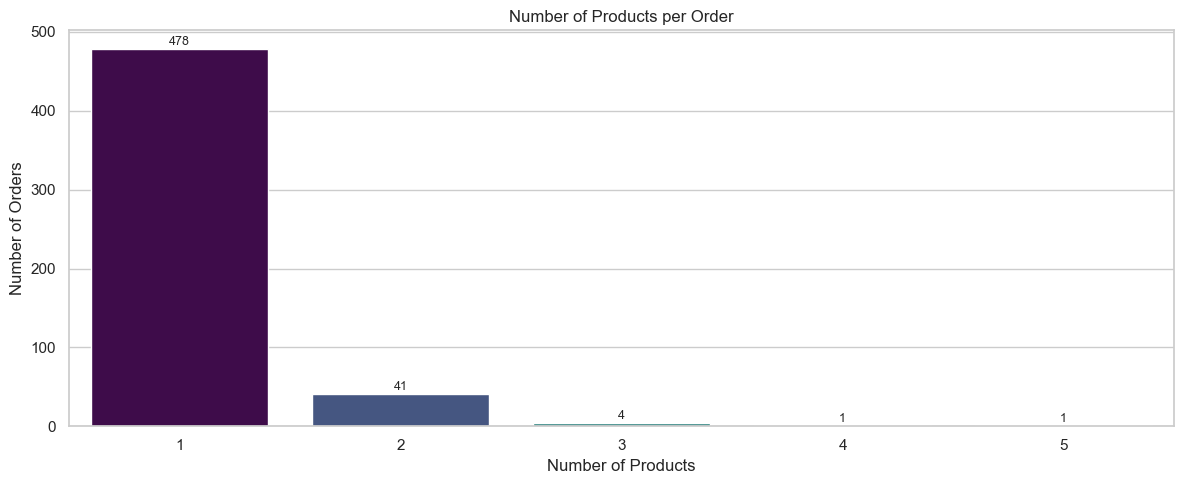

In [130]:
# Step 1: Count the number of unique products per order
multi_product_df = Order_Details.groupby('Name')['Product'].nunique().reset_index()
multi_product_df.columns = ['Name', 'num_products']

# Step 2: Plot the frequency of the number of products in each order
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=multi_product_df, x='num_products', hue='num_products', 
                   palette='viridis', legend=False)
plt.title('Number of Products per Order')
plt.xlabel('Number of Products')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1,   # Label position (x, y)
            int(height),                                  # Label content
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Average order value over days

In [123]:
mean_day = Order_Details.groupby('DayName')['Amount'].mean()

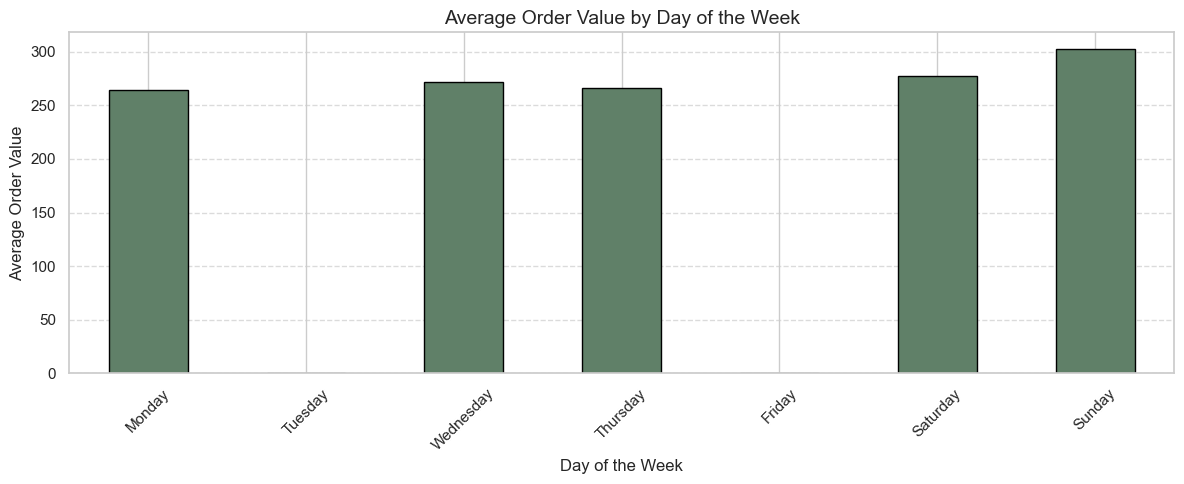

In [126]:
import matplotlib.pyplot as plt

# Sort the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_day = mean_day.reindex(day_order)

# Draw plot
plt.figure(figsize=(12, 5))
mean_day.plot(kind='bar', color="#608068", edgecolor='black')

plt.title('Average Order Value by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Average order value over hours

In [127]:
mean_hour = Order_Details.groupby('Hour')['Amount'].mean()

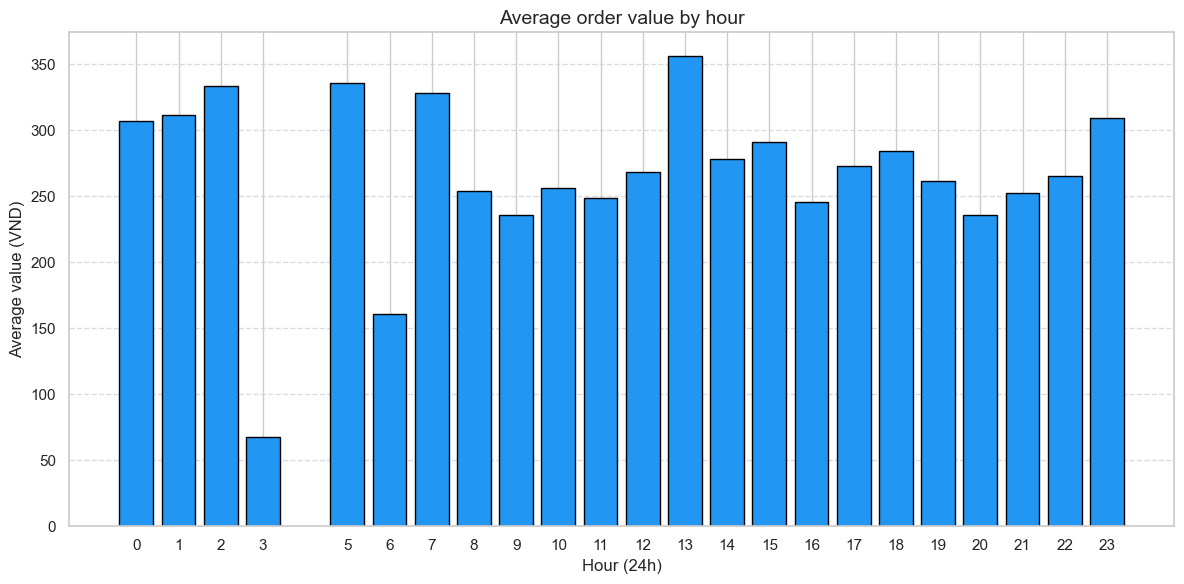

In [128]:
import matplotlib.pyplot as plt

# Sort the hour
mean_hour = mean_hour.sort_index()

# Draw plot
plt.figure(figsize=(12, 6))
plt.bar(mean_hour.index, mean_hour.values, color='#2196F3', edgecolor='black')

# Title and labels
plt.title('Average order value by hour', fontsize=14)
plt.xlabel('Hour (24h)', fontsize=12)
plt.ylabel('Average value (VND)', fontsize=12)
plt.xticks(mean_hour.index)  # Show label X
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## 🔁 Conclusion:

**Key Findings** 📈

The analysis focused on transaction times during the day and revealed the following key insights:

- **Peak Shopping Hours:** Customers make the most purchases during two main time slots: **12:00 PM (noon)** and **11:00 PM**. These are the two peak hours with the highest order volume during the day.

- **General Trend:** Shopping activity tends to increase gradually from the morning, becomes vibrant around noon, and peaks in the evening and late at night.

- **Other High-Activity Hours:** In addition to the two main peaks, time slots such as **10:00 PM** and **7:00 PM** also recorded very high transaction volumes.

-   **The transaction values** are mainly concentrated between 50 and 450.

-   **Most customers make only 1 to 2 transactions**, while those who make more than 2 transactions are few but tend to have higher order values.

**Actions** 🎯

- **Campaign Strategy:** Focus on launching ad campaigns, email marketing, and promotional offers (flash sales) during peak hours like **12:00 PM** and **from 7:00 PM to 11:00 PM** to maximize reach and conversions.

-   **There is still significant customer potential**, so marketing efforts should focus on encouraging customers to increase their transaction frequency beyond two.

- **Customer Support Staffing:** Ensure customer support (via chat or hotline) is available and responsive during these high-activity periods.

- **Product Analysis:** Recommend best-selling products to customers during peak hours to boost revenue. Also suggest commonly bought-together products to create attractive combo deals and increase sales.
